In [12]:
import pandas as pd
import numpy as np


In [13]:
Feature_1 = ["x","x","x","x","x","x","x","x"]
Feature_2 = ["x","x","x","x","x","x","x","x"]

Target = [0, 0, 1, 1, 0, 1, 1, 1]
Predictions = [0.4, 0.13, 0.65, 0.89, 0.76,0.42,0.33,0.15]

df = pd.DataFrame({
    'Variable_1': Feature_1,
    'Variable_2': Feature_2,
    'Target' : Target,
    'Predictions':Predictions
})

df


,Variable_1,Variable_2,Target,Predictions
0,x,x,0,0.40
1,x,x,0,0.13
2,x,x,1,0.65
3,x,x,1,0.89
4,x,x,0,0.76
5,x,x,1,0.42
6,x,x,1,0.33
7,x,x,1,0.15


In [14]:
threshold=0.5
df['pred_0.5'] = (df['Predictions'] > threshold).astype('int')
df

,Variable_1,Variable_2,Target,Predictions,pred_0.5
0,x,x,0,0.40,0
1,x,x,0,0.13,0
2,x,x,1,0.65,1
3,x,x,1,0.89,1
4,x,x,0,0.76,1
5,x,x,1,0.42,0
6,x,x,1,0.33,0
7,x,x,1,0.15,0


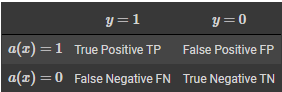

In [15]:
def confusion_matrix_new(y_true,y_pred):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  import matplotlib.pyplot as plt
  cm = confusion_matrix(y_true, y_pred)
  # Extract TP, FP, FN, TN values
  tn, fp, fn, tp  = cm.ravel()
  # Create heatmap with annotations
  sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',cbar=False,
              annot_kws={'size': 14, 'weight': 'bold'})
  # Add annotations for each box
  plt.text(0.5, 0.8, f'TN\n', ha='center',
           va='center', fontsize=12, fontweight='bold')
  plt.text(0.5, 1.8, f'FN\n', ha='center',
           va='center', fontsize=12, fontweight='bold')
  plt.text(1.5, 0.8, f'FP\n', ha='center',
           va='center', fontsize=12, fontweight='bold')
  plt.text(1.5, 1.8, f'TP\n', ha='center',
           va='center', fontsize=12, fontweight='bold')

  # Set title and axis labels
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  # Show plot
  plt.show()

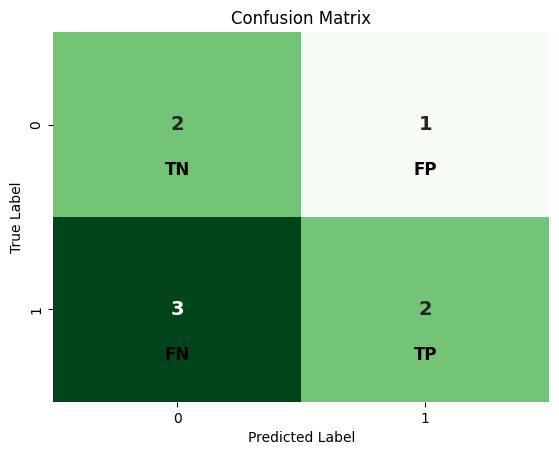

In [16]:
confusion_matrix_new(y_true=df['Target'], y_pred=df['pred_0.5'])

In [17]:

from sklearn.metrics import precision_score

precision_score(df['Target'], df['pred_0.5'])


0.6666666666666666

In [18]:

from sklearn.metrics import recall_score
recall_score(df['Target'], df['pred_0.5'])

0.4

In [19]:
threshold=0.8
df['pred_0.8'] = (df['Predictions'] > threshold).astype('int')
threshold=0.3
df['pred_0.3'] = (df['Predictions'] > threshold).astype('int')
df

,Variable_1,Variable_2,Target,Predictions,pred_0.5,pred_0.8,pred_0.3
0,x,x,0,0.40,0,0,1
1,x,x,0,0.13,0,0,0
2,x,x,1,0.65,1,0,1
3,x,x,1,0.89,1,1,1
4,x,x,0,0.76,1,0,1
5,x,x,1,0.42,0,0,1
6,x,x,1,0.33,0,0,1
7,x,x,1,0.15,0,0,0


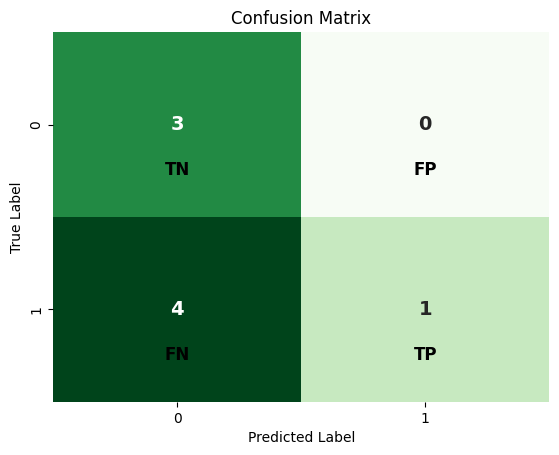

In [20]:
confusion_matrix_new(y_true=df['Target'], y_pred=df['pred_0.8'])

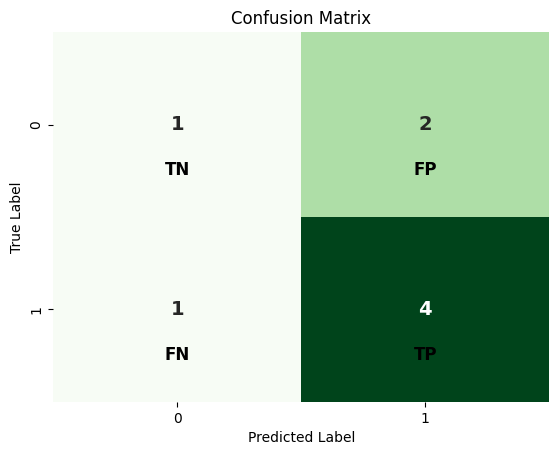

In [21]:
confusion_matrix_new(y_true=df['Target'], y_pred=df['pred_0.3'])

In [22]:


# Define precision and recall scores
precision_50 = precision_score(df['Target'], df['pred_0.5'])
precision_80 = precision_score(df['Target'], df['pred_0.8'])
precision_30 = precision_score(df['Target'], df['pred_0.3'])

recall_80 = recall_score(df['Target'], df['pred_0.8'])
recall_50 = recall_score(df['Target'], df['pred_0.5'])
recall_30 = recall_score(df['Target'], df['pred_0.3'])

# Create a DataFrame
data = {
    'precision': [precision_50, precision_80, precision_30],
    'recall': [recall_50, recall_80, recall_30]
}
import pandas as pd

# Define precision and recall scores
precision_50 = precision_score(df['Target'], df['pred_0.5'])
precision_80 = precision_score(df['Target'], df['pred_0.8'])
precision_30 = precision_score(df['Target'], df['pred_0.3'])

recall_80 = recall_score(df['Target'], df['pred_0.8'])
recall_50 = recall_score(df['Target'], df['pred_0.5'])
recall_30 = recall_score(df['Target'], df['pred_0.3'])

# Create a DataFrame
data = {
    'precision': [precision_50, precision_80, precision_30],
    'recall': [recall_50, recall_80, recall_30]
}
index_names = ['Threshold_0.5', 'Threshold_0.8',"Threshold_0.3"]

df_scores = pd.DataFrame(data, index=index_names)


# Display the DataFrame
df_scores


,precision,recall
Threshold_0.5,0.666667,0.4
Threshold_0.8,1.000000,0.2
Threshold_0.3,0.666667,0.8


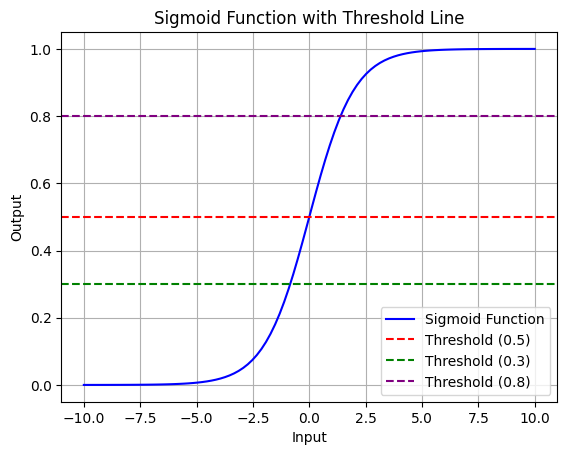

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x_values = np.linspace(-10, 10, 100)

# Compute y values using sigmoid function
y_values = sigmoid(x_values)

# Plot sigmoid function
plt.plot(x_values, y_values, label='Sigmoid Function', color='blue')

# Add threshold line
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.axhline(y=0.3, color='green', linestyle='--', label='Threshold (0.3)')
plt.axhline(y=0.8, color='purple', linestyle='--', label='Threshold (0.8)')


# Plot settings
plt.title('Sigmoid Function with Threshold Line')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
